In [7]:
from hdmf_zarr import NWBZarrIO
from nwbwidgets import nwb2widget
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
# To create a list of all nwb files available
import os
from pathlib import Path
dir = 'data/409828_V1DD_GoldenMouse/'
nwb_file_list = list(Path(dir).glob("*.nwb"))

In [28]:
metadata = pd.read_csv('/data/metadata/V1DD_metadata.csv', index_col = False) 
metadata.head()

,project_name,_id,name,subject_id,golden_mouse,genotype,date_of_birth,sex,modality,session_date,age,session_time,column,volume
0,V1 Deep Dive,3b85c659-20c8-438f-ab58-de1aac3b81cf,416296_2018-11-29_12-08-40_nwb_2025-08-08_16-2...,416296,False,Camk2a-tTA/wt;tetO-GCaMP6s/wt,2018-08-06,Female,"['Planar optical physiology', 'Behavior videos']",2018-11-29,115,12:08:40.014190,2,5
1,V1 Deep Dive,b98ce4a9-a66b-4b70-baa6-95ef451ae087,427836_2019-04-25_12-16-58_nwb_2025-08-08_16-2...,427836,False,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai94(TITL-G...,2018-10-08,Female,"['Planar optical physiology', 'Behavior videos']",2019-04-25,199,12:16:58.240890,5,3
2,V1 Deep Dive,5cccd09c-4ae8-4d8e-ae92-23099d22bbe2,427836_2019-04-24_13-06-45_nwb_2025-08-08_16-2...,427836,False,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai94(TITL-G...,2018-10-08,Female,"['Planar optical physiology', 'Behavior videos']",2019-04-24,198,13:06:45.257460,4,3
3,V1 Deep Dive,911d215f-dafa-4b39-86f7-b36336974da1,427836_2019-04-25_13-49-39_nwb_2025-08-08_16-2...,427836,False,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai94(TITL-G...,2018-10-08,Female,"['Planar optical physiology', 'Behavior videos']",2019-04-25,199,13:49:39.163550,5,4
4,V1 Deep Dive,c918f874-d534-4341-b0dc-f1aba388af66,427836_2019-04-26_12-54-40_nwb_2025-08-08_16-2...,427836,False,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai94(TITL-G...,2018-10-08,Female,"['Planar optical physiology', 'Behavior videos']",2019-04-26,200,12:54:40.332660,2,4


In [31]:
metadata.columns

Index(['project_name', '_id', 'name', 'subject_id', 'golden_mouse', 'genotype',
       'date_of_birth', 'sex', 'modality', 'session_date', 'age',
       'session_time', 'column', 'volume'],
      dtype='object')

In [49]:
metadata.loc[metadata['golden_mouse'],['column', 'volume']].value_counts()

column  volume
1       1         1
        2         1
        3         1
        4         1
        5         1
2       1         1
        2         1
        3         1
        4         1
        5         1
3       1         1
        2         1
        3         1
        4         1
        5         1
4       1         1
        2         1
        3         1
        4         1
        5         1
5       1         1
        2         1
        3         1
        4         1
        5         1
Name: count, dtype: int64

In [19]:
nwb_file_list

[]

In [51]:
# To get column 1 ( central column ) volumn 5 dataset: 
golden_mouse_df = metadata.loc[metadata['golden_mouse']]
col_1_v5 = golden_mouse_df.loc[golden_mouse_df['column' == 1] & golden_mouse_df['volumn ' == 5], 'name']

KeyError: False

In [9]:
# nwbfile_path_zarr = '/data/409828_V1DD_GoldenMouse/409828_2018-11-06_14-02-59_nwb_2025-08-08_16-27-52/409828_2018-11-06_14-02-59_nwb_2025-08-08_16-27-52.nwb.zarr'
io = NWBZarrIO(nwbfile_path_zarr, "r")
nwbfile_read = io.read()

/opt/conda/lib/python3.10/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.9.0 because version 2.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


In [11]:
nwb2widget(nwbfile_read)

In [3]:
#for one plane, select good rois and load those traces and their timestamps
plane = "plane-5" #choose which plane you want
rois = nwbfile_read.processing[plane].data_interfaces['image_segmentation']['roi_table'][:]
good_rois = rois[rois.is_soma==True].roi.values
dff = nwbfile_read.processing[plane].data_interfaces['dff'].data[:,good_rois]
timestamps = nwbfile_read.processing[plane].data_interfaces['dff'].timestamps[:]

In [37]:
vascular_mp_image = nwbfile_read.acquisition['vasculature_maps'].images

In [47]:
type(vascular_mp_image)

hdmf.utils.LabelledDict

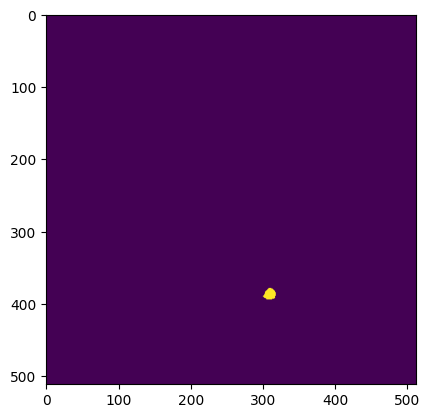

In [18]:
plt.imshow(rois.image_mask[2])

In [19]:
import numpy as np
all_images = np.array(list(rois.image_mask))[good_rois]
all_images.shape



(316, 512, 512)

In [20]:
print(good_rois)

[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
   14   15   16   17   18   19   20   21   22   23   24   25   26   27
   29   30   31   32   33   34   35   36   37   38   39   40   41   42
   43   44   46   47   48   49   50   51   52   53   54   55   56   57
   58   59   60   61   62   63   64   65   66   67   68   69   70   71
   72   73   74   75   76   77   78   79   80   81   82   83   84   85
   86   87   88   89   90   91   92   93   94   95   96   97   98   99
  100  101  102  103  104  105  106  107  108  109  111  112  113  114
  115  116  117  118  119  120  121  122  123  124  125  126  127  128
  129  130  131  132  134  135  136  137  138  139  140  141  142  143
  144  145  146  147  148  149  150  151  152  153  154  155  156  157
  158  159  160  161  162  164  165  166  167  168  169  170  171  172
  173  174  175  177  178  180  181  182  183  184  185  186  187  188
  189  190  193  194  195  196  198  199  200  201  202  203  204  206
  208 

In [21]:
final_image = all_images.sum(0)

In [22]:
images = nwbfile_read.stimulus['locally_sparse_noise']


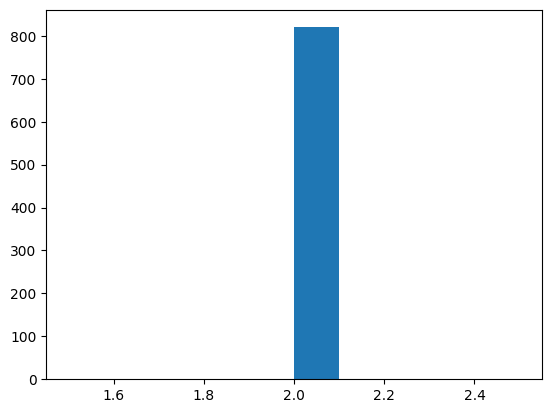

In [23]:
plt.hist(final_image[final_image > 1])
plt.show()

In [24]:
dff.shape

(22029, 316)

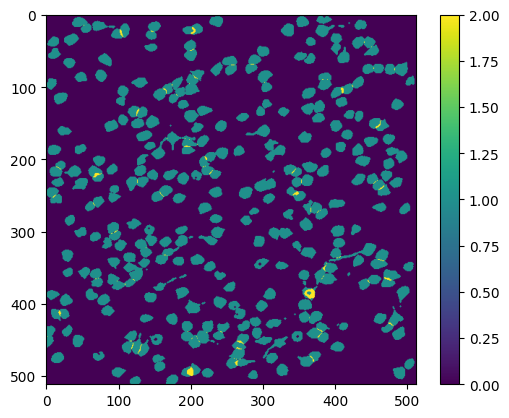

In [25]:
#plt.imshow(final_image)

plt.imshow(final_image)
plt.colorbar()

In [30]:
dff

array([[11.488764  ,  1.5276613 ,  2.1884809 , ...,  2.8401792 ,
         1.9754962 ,  1.6578664 ],
       [ 6.8630195 ,  1.0108145 ,  0.9800831 , ...,  1.3294847 ,
         1.0541931 ,  1.3156832 ],
       [ 5.103201  ,  1.4439477 ,  0.7883545 , ...,  1.0822562 ,
         1.7161732 ,  2.2944162 ],
       ...,
       [ 0.0752779 ,  0.9960267 ,  0.2830626 , ...,  0.82868654,
         1.8694046 ,  1.3088742 ],
       [ 1.210551  ,  0.4519635 ,  0.78934884, ...,  1.259581  ,
         0.9352932 ,  1.8890498 ],
       [-0.3910274 ,  0.6718369 ,  0.31094387, ...,  0.52123773,
         0.75966084,  2.4862015 ]], shape=(22029, 316), dtype=float32)

In [27]:
from matplotlib import pyplot as plt

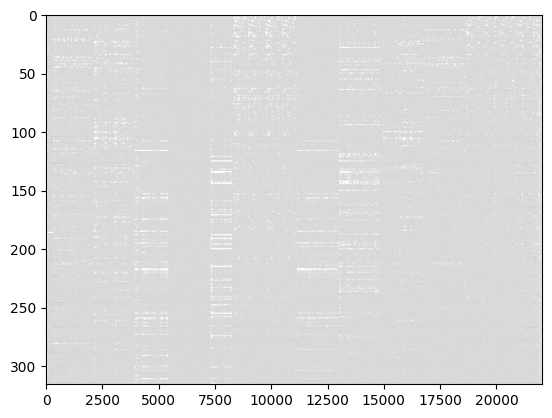

In [28]:
plt.imshow(dff.T ,aspect = 'auto', vmax = 0.5, cmap='gray')

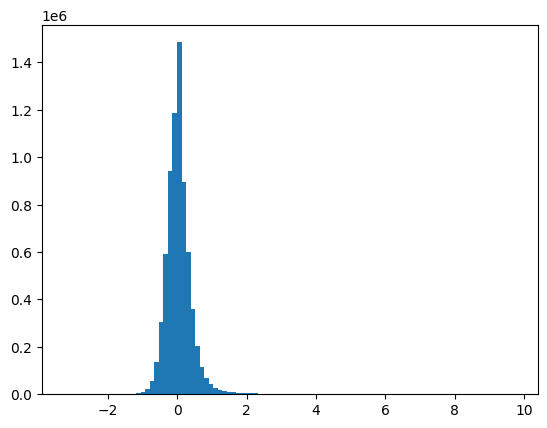

In [82]:
plt.hist(dff.flatten(), bins = 100)
plt.show()

In [85]:
dff.mean()

np.float32(0.04571954)